# Optimization and gradient descent

Toy example demonstrating optimization via gradient descent with a simple, easy-to-visualize function.

## Notebook set-up

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 1. Problem statement

Dr. P is tired of grading hundreds of labs, problems sets & exams. But, while looking at grades for past semesters, he noticed an interesting phenomenon - there seems to be a strong correlation between attendance and final grade. Maybe we can use a student's attendance to predict there score.

## 2. Goal

Write a custom optimization function to fit a linear model to the provided data.

The goal of this mini-project is to get you thinking about optimization - how do we fit a model to data? How do we quantify 'how good' a model is? The best way to think deeply about a topic is start with a tractable example and think it though.

## 3. Data

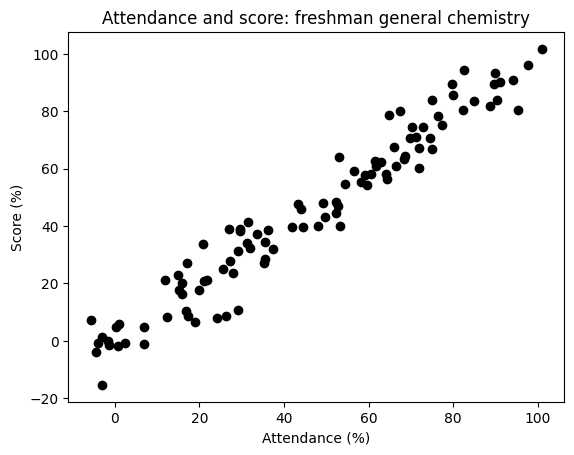

In [2]:
n = 100
noise_width = 5
attendance = np.array(list(range(n))) + np.random.normal(-noise_width, noise_width, n)
score = np.array(list(range(n))) + np.random.normal(-noise_width, noise_width, n)

plt.title('Attendance and score: freshman general chemistry')
plt.scatter(attendance, score, color='black')
plt.xlabel('Attendance (%)')
plt.ylabel('Score (%)')
plt.show()

## 4. Model functions

Write two functions:

1. **Linear model**: function that accepts three arguments: a list of attendance values, a slope ('m' parameter) and a y-intercept ('b' parameter). The function should then use these three arguments to calculate and return a list of scores.
2. **Error function**: takes list of true scores and list of predicted scores from the linear model as arguments. Calculates the average of the difference between the true and predicted value for each student.

**Hint**: square or take the absolute value of each difference before averaging them - this prevents the tendency of negative and positive error values to cancel out.

### 4.1. Linear model

In [3]:
def linear_model(attendance, m, b):
    """
    Linear model that predicts scores based on attendance.
    
    Args:
        attendance: list/array of attendance percentages
        m: slope parameter
        b: y-intercept parameter
    
    Returns:
        predicted_scores: list/array of predicted scores
    """
    predicted_scores = m * np.array(attendance) + b
    return predicted_scores

### 4.2. Error function

In [4]:
def error_function(true_scores, predicted_scores):
    """
    Calculate the mean squared error between true and predicted scores.
    
    Args:
        true_scores: list/array of true score values
        predicted_scores: list/array of predicted score values
    
    Returns:
        error: mean squared error
    """
    # Calculate squared differences to prevent positive and negative errors from canceling out
    squared_errors = (np.array(true_scores) - np.array(predicted_scores)) ** 2
    # Return the average error
    error = np.mean(squared_errors)
    return error

## 5. Optimizer

Write an optimization function which iteratively tries different values of m and b. The function should calculate the error for a given parameter set (choice of m and b), then update those values based on the size of the error. Along the way, the function should keep the 'winning' values and then return the best parameters at the end. Here are the rough steps the loop should follow:

1. Pick values for m and b
2. Call the linear model to get predictions for all of the student's scores
3. Call the error function to calculate the error of the predictions relative to the true values
4. Decide how much and in which direction to change the values of m and b
5. Repeat

**Hints**: 
1. Look at the toy data - is it visually obvious what the value of b should be? If you can, set b to a constant. This way you only have to optimize m.
2. Keep a 'memory' of the values you have tried so far and their error values.


In [5]:
def optimizer(attendance, score, linear_model, error_function):
    """
    Optimize the linear model parameters using a simple grid search.
    
    Args:
        attendance: list/array of attendance values
        score: list/array of true score values
        linear_model: function to make predictions
        error_function: function to calculate error
    
    Returns:
        best_m: optimal slope parameter
        best_b: optimal y-intercept parameter
        m_values: list of tried m values
        errors: list of corresponding errors
    """
    # Set b to a constant (looking at the data, it starts near 0)
    b = 0
    
    # Try different values of m (slope)
    m_values = np.linspace(0.1, 2.0, 100)  # Try 100 different slopes between 0.1 and 2.0
    errors = []
    
    best_m = None
    best_error = float('inf')
    
    # Test each value of m
    for m in m_values:
        # Get predictions using current parameters
        predictions = linear_model(attendance, m, b)
        
        # Calculate error
        current_error = error_function(score, predictions)
        errors.append(current_error)
        
        # Keep track of the best parameters
        if current_error < best_error:
            best_error = current_error
            best_m = m
    
    print(f"Best parameters found: m = {best_m:.4f}, b = {b}")
    print(f"Best error: {best_error:.4f}")
    
    return best_m, b, m_values, errors

## 6. Results

Plot the following:

1. The final linear model and the grade data on the same plot. How good is the model? Is it a good idea to use this when grading students?
2. The value of m vs the error for all of the values sampled during optimization. Is this the 'best' model? How could the algorithm be improved. Could we make it faster/more efficient?

In [6]:
# Run the optimizer to find the best parameters
best_m, best_b, m_values, errors = optimizer(attendance, score, linear_model, error_function)

# Get the final predictions using the best parameters
final_predictions = linear_model(attendance, best_m, best_b)

Best parameters found: m = 0.9828, b = 0
Best error: 47.3151


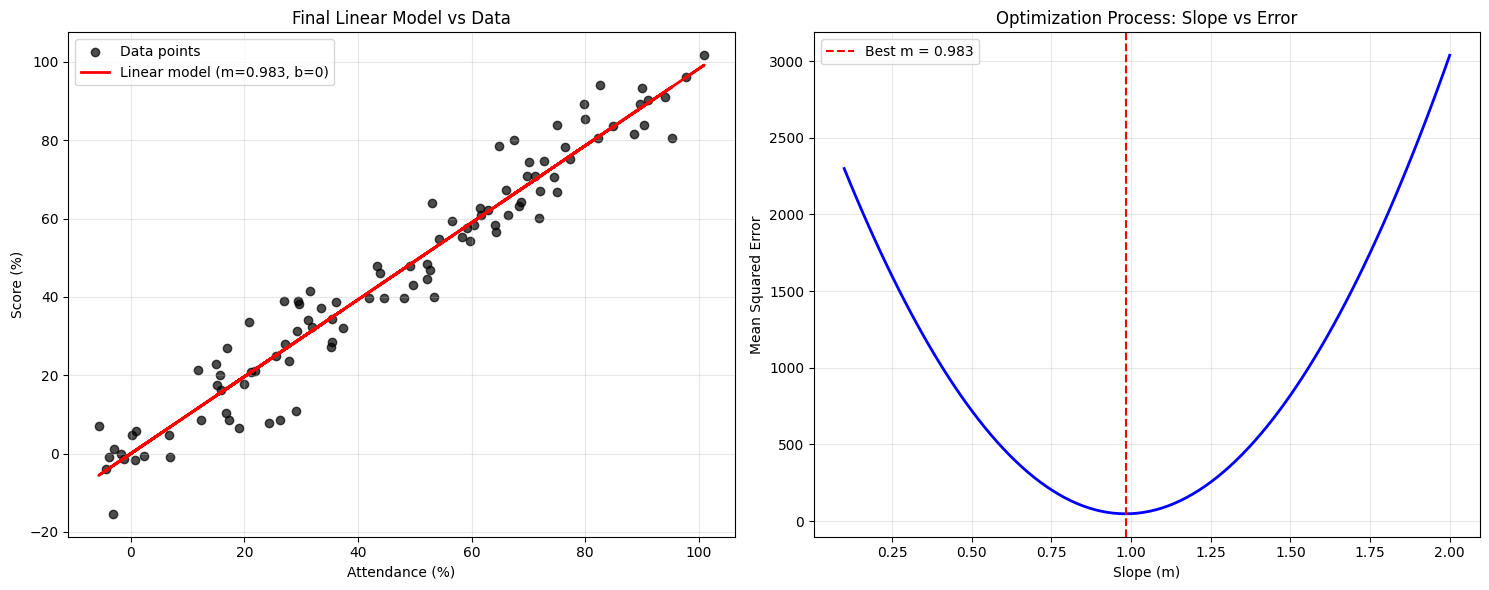


Model Performance:
Correlation between true and predicted scores: 0.9722
Final mean squared error: 47.3151
Root mean squared error: 6.8786

Model Analysis:
The linear model equation is: Score = 0.983 × Attendance + 0
This means for every 1% increase in attendance, the score increases by 0.983 points on average.
The model explains 94.5% of the variance in the data.


In [7]:
# Create two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: Final linear model and the grade data
ax1.scatter(attendance, score, color='black', alpha=0.7, label='Data points')
ax1.plot(attendance, final_predictions, color='red', linewidth=2, label=f'Linear model (m={best_m:.3f}, b={best_b})')
ax1.set_title('Final Linear Model vs Data')
ax1.set_xlabel('Attendance (%)')
ax1.set_ylabel('Score (%)')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: m values vs error during optimization
ax2.plot(m_values, errors, 'b-', linewidth=2)
ax2.axvline(x=best_m, color='red', linestyle='--', label=f'Best m = {best_m:.3f}')
ax2.set_title('Optimization Process: Slope vs Error')
ax2.set_xlabel('Slope (m)')
ax2.set_ylabel('Mean Squared Error')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Calculate some statistics about the model performance
correlation = np.corrcoef(score, final_predictions)[0, 1]
print(f"\nModel Performance:")
print(f"Correlation between true and predicted scores: {correlation:.4f}")
print(f"Final mean squared error: {min(errors):.4f}")
print(f"Root mean squared error: {np.sqrt(min(errors)):.4f}")

# Analysis of the model
print(f"\nModel Analysis:")
print(f"The linear model equation is: Score = {best_m:.3f} × Attendance + {best_b}")
print(f"This means for every 1% increase in attendance, the score increases by {best_m:.3f} points on average.")
print(f"The model explains {correlation**2:.1%} of the variance in the data.")

## 7. Discussion

### Is this a good idea for grading students?

**Short answer: No!** 

While there's clearly a strong correlation between attendance and performance, using attendance to predict grades raises several important concerns:

1. **Causation vs Correlation**: The correlation doesn't necessarily mean attendance causes better grades. Students who attend more might also study more, be more engaged, or have fewer external pressures.

2. **Fairness**: Some students might miss class due to legitimate reasons (illness, family emergencies, work obligations) but still master the material through self-study.

3. **Different Learning Styles**: Some students learn effectively through reading and independent study and might not need to attend every class.

4. **Circular Logic**: If attendance becomes part of the grade, it creates a feedback loop that doesn't reflect actual learning.

### How could the algorithm be improved?

1. **Better Optimization**: Use gradient descent instead of grid search for more efficient parameter finding
2. **Cross-validation**: Split data into training/validation sets to test generalization
3. **Multiple Features**: Include other predictors like homework completion, quiz scores, etc.
4. **Regularization**: Add penalties to prevent overfitting
5. **Non-linear Models**: Try polynomial or other non-linear relationships

The current grid search approach works but is computationally expensive. A gradient-based method would be much faster and could handle multiple parameters simultaneously.